In [2]:
#Installing packages

!pip install jupyter
!pip install yfinance


'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#Importing packages

from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
#Download Apple and SNP data from yfinance, assign to variable 'raw'

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2022-12-31')

[*********************100%***********************]  2 of 2 completed


In [5]:
#Display data frame to get a general idea of dataset

raw

Price                       Adj Close                   Close              \
Ticker                           AAPL         SPY        AAPL         SPY   
Date                                                                        
2010-01-04 00:00:00+00:00    6.454504   86.580750    7.643214  113.330002   
2010-01-05 00:00:00+00:00    6.465665   86.809929    7.656429  113.629997   
2010-01-06 00:00:00+00:00    6.362819   86.871040    7.534643  113.709999   
2010-01-07 00:00:00+00:00    6.351057   87.237762    7.520714  114.190002   
2010-01-08 00:00:00+00:00    6.393281   87.528069    7.570714  114.570000   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00+00:00  130.631378  374.799988  131.860001  382.910004   
2022-12-27 00:00:00+00:00  128.818405  373.321991  130.029999  381.399994   
2022-12-28 00:00:00+00:00  124.865585  368.682373  126.040001  376.660004   
2022-12-29 00:00:00+00:00  128.402313  375.318756  129.610001  383.440002   
2022-12-30 00:00:00+00:00  128.719345  374.330139  129.929993  382.429993   

Price                            High                     Low              \
Ticker                           AAPL         SPY        AAPL         SPY   
Date                                                                        
2010-01-04 00:00:00+00:00    7.660714  113.389999    7.585000  111.510002   
2010-01-05 00:00:00+00:00    7.699643  113.680000    7.616071  112.849998   
2010-01-06 00:00:00+00:00    7.686786  113.989998    7.526786  113.430000   
2010-01-07 00:00:00+00:00    7.571429  114.330002    7.466071  113.180000   
2010-01-08 00:00:00+00:00    7.571429  114.620003    7.466429  113.660004   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00+00:00  132.419998  383.059998  129.639999  378.029999   
2022-12-27 00:00:00+00:00  131.410004  383.149994  128.720001  379.649994   
2022-12-28 00:00:00+00:00  131.029999  383.390015  125.870003  376.420013   
2022-12-29 00:00:00+00:00  130.479996  384.350006  127.730003  379.079987   
2022-12-30 00:00:00+00:00  129.949997  382.579987  127.430000  378.429993   

Price                            Open                 Volume             
Ticker                           AAPL         SPY       AAPL        SPY  
Date                                                                     
2010-01-04 00:00:00+00:00    7.622500  112.370003  493729600  118944600  
2010-01-05 00:00:00+00:00    7.664286  113.260002  601904800  111579900  
2010-01-06 00:00:00+00:00    7.656429  113.519997  552160000  116074400  
2010-01-07 00:00:00+00:00    7.562500  113.500000  477131200  131091100  
2010-01-08 00:00:00+00:00    7.510714  113.889999  447610800  126402800  
...                               ...         ...        ...        ...  
2022-12-23 00:00:00+00:00  130.919998  379.649994   63814900   59857300  
2022-12-27 00:00:00+00:00  131.380005  382.790009   69007800   51638200  
2022-12-28 00:00:00+00:00  129.669998  381.329987   85438400   70911500  
2022-12-29 00:00:00+00:00  127.989998  379.630005   75703700   66970900  
2022-12-30 00:00:00+00:00  128.410004  380.640015   77034200   84022200  

[3272 rows x 12 columns]

In [6]:
#We want to simplify the dataframe suhc that only the Apple stock is shown without nested column headers
#Display just the column header data
    
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [7]:
# Write a function that takes just the price headers, e.g. the 0th position of the column object
# .iloc used to select rows and columns based on index, this line uses selects every second column starting at the first index, isolating Apple
# .pipe allows us to insert a function as a command into a sequence of other function for brevity 

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

aapl = (raw
    .iloc[:, ::2]
    .pipe(fix_cols)
)

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,6.454504,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.393281,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,130.631378,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27 00:00:00+00:00,128.818405,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28 00:00:00+00:00,124.865585,126.040001,131.029999,125.870003,129.669998,85438400


<Axes: xlabel='Date'>

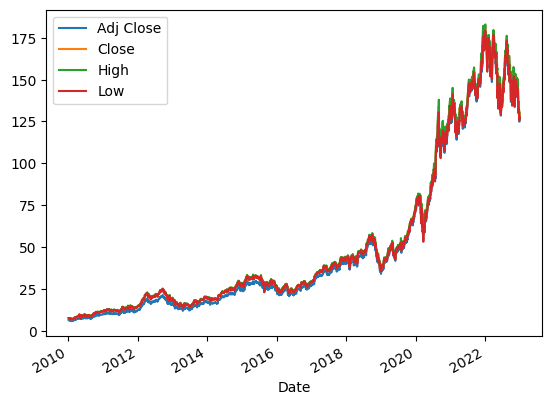

In [8]:
#Plot the key data in a line graph (exclude Volume and Open price)

(aapl
 .iloc[:, 0:-2:]
.plot()
)

<Axes: xlabel='Date'>

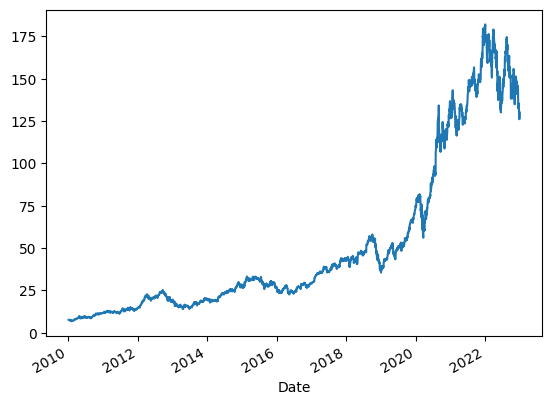

In [9]:
#Now just the Close price

(aapl
.Close
.plot()
)

<Axes: xlabel='Date'>

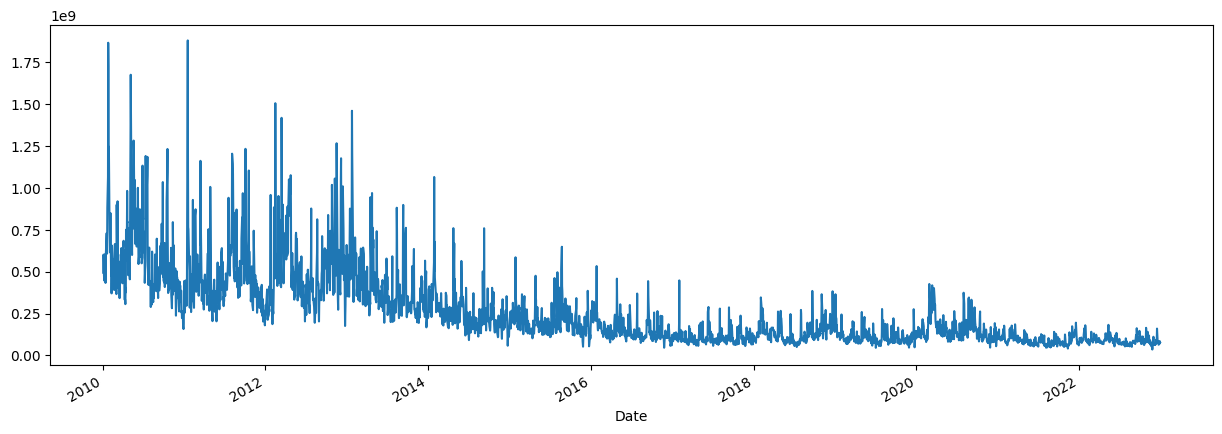

In [10]:
#Volume plot with customised dimensions

(aapl
.Volume
.plot(figsize = (15,5))
)

C:\Users\matya\AppData\Local\Temp\ipykernel_6532\970507851.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


<Axes: xlabel='Date'>

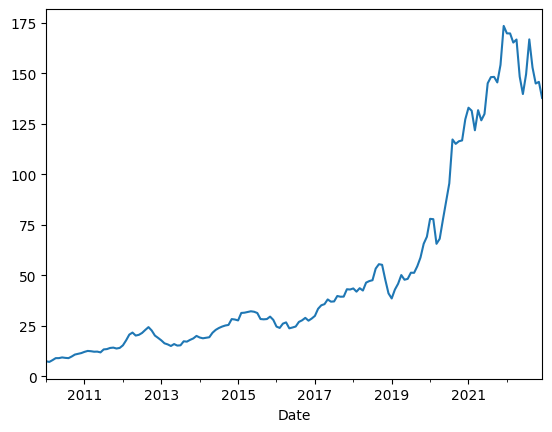

In [11]:
#Data is resampled to be the mean monthly price, aggregation fucntion is specified with .mean()

(aapl
 .resample('M')
 .Close
 .mean()
 .plot()
)

C:\Users\matya\AppData\Local\Temp\ipykernel_6532\723610745.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


,Open,High,Low,Close
Date,,,,
2010-01-31 00:00:00+00:00,7.622500,7.699643,6.794643,6.859286
2010-02-28 00:00:00+00:00,6.870357,7.327500,6.816071,7.307857
2010-03-31 00:00:00+00:00,7.348214,8.481429,7.337500,8.392857
2010-04-30 00:00:00+00:00,8.478929,9.730714,8.312500,9.324643
2010-05-31 00:00:00+00:00,9.422857,9.567143,7.116071,9.174286
2010-06-30 00:00:00+00:00,9.274643,9.964643,8.650000,8.983214
2010-07-31 00:00:00+00:00,9.082143,9.499643,8.557143,9.187500
2010-08-31 00:00:00+00:00,9.301429,9.438571,8.412857,8.682143
2010-09-30 00:00:00+00:00,8.838214,10.526071,8.795714,10.133929


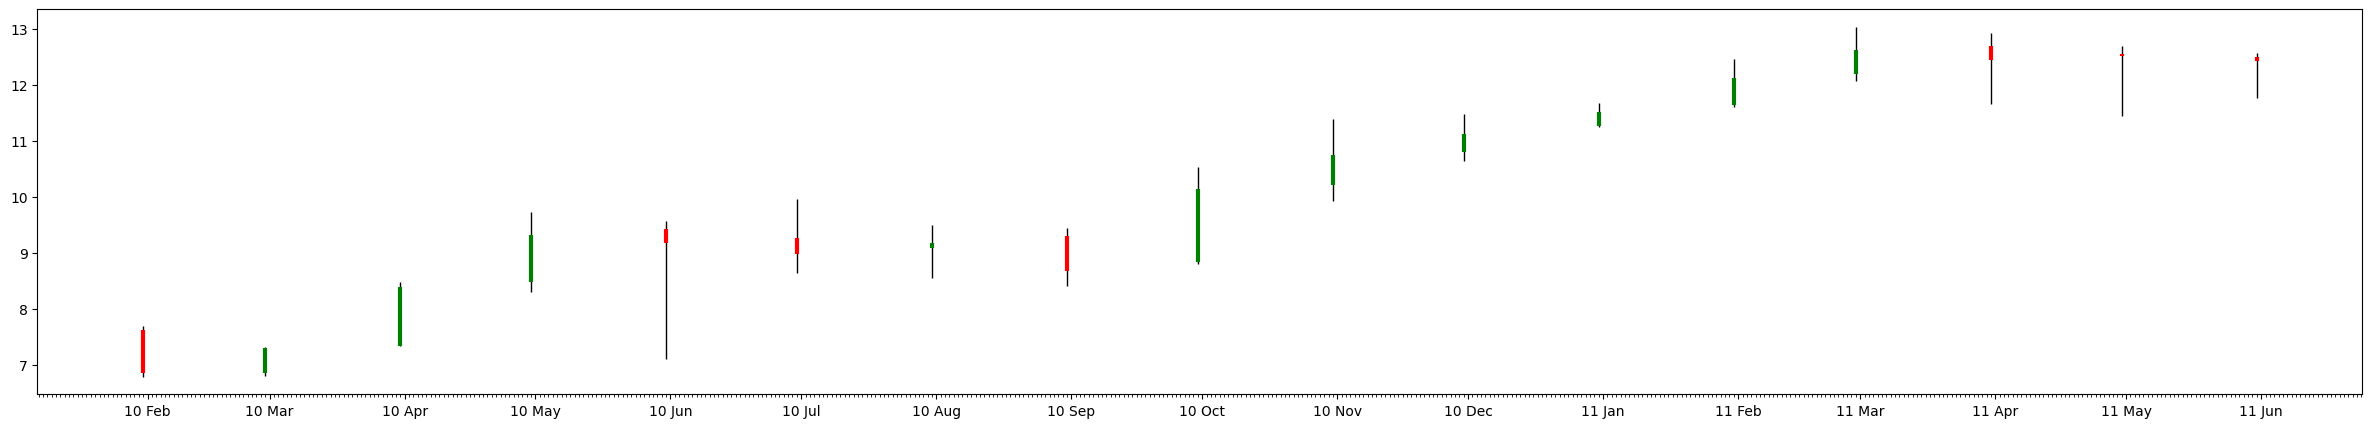

In [12]:
#Write a function to make a candlestick plot, inputs are the df and axes object
#.vlines is vertical, x location is the index of the variable, the top and bottom of the candlestick are the high and low values for that month in black
#if the opne value is bigger than close, vertical lines will be plotted in red 
#In green if they have gone up (limits are dictated by opne and close , not high and low
#Format x axis labels
#Aggregate each column in a different way, pandas needs to know how to choose whihc value in the month to use

fig, ax = plt.subplots(figsize=(30, 5))
def plot_candle(df, ax):
    
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    
    green=df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%y %b'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(aapl
.resample('M')
.agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
.loc['Jan 2010':'May 2011']
.pipe(plot_candle, ax)
 )

,Open,High,Low,Close
Date,,,,
2019-09-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2019-09-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2019-09-03 00:00:00+00:00,51.607498,51.744999,51.055000,51.424999
2019-09-04 00:00:00+00:00,52.097500,52.369999,51.830002,52.297501
2019-09-05 00:00:00+00:00,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-27 00:00:00+00:00,72.779999,73.492500,72.029999,72.449997
2019-12-28 00:00:00+00:00,NaN,NaN,NaN,NaN
2019-12-29 00:00:00+00:00,NaN,NaN,NaN,NaN


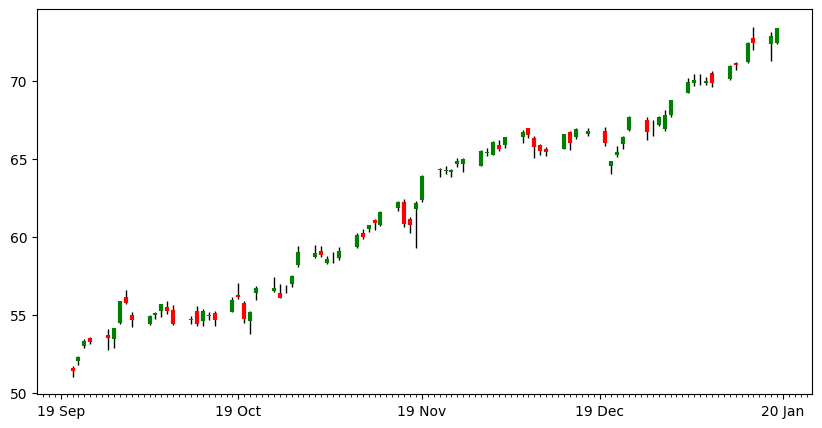

In [13]:
#Resample by day and take the average daily value between Sep and Dec

fig, ax = plt.subplots(figsize=(10, 5))

(aapl
.resample('d')
.agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
.loc['Sep 2019':'Dec 2019']
.pipe(plot_candle, ax)
 )

In [14]:
#Want to work with just 2009 to 2019

aapl = (aapl
        .loc['2009':'2019'])

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,6.454504,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.393281,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-24 00:00:00+00:00,68.974495,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26 00:00:00+00:00,70.342979,72.477501,72.495003,71.175003,71.205002,93121200
2019-12-27 00:00:00+00:00,70.316269,72.449997,73.492500,72.029999,72.779999,146266000


In [15]:
#Percent change

aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06 00:00:00+00:00,-0.015907,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07 00:00:00+00:00,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08 00:00:00+00:00,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-24 00:00:00+00:00,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26 00:00:00+00:00,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864
2019-12-27 00:00:00+00:00,-0.000380,-0.000379,0.013760,0.012013,0.022119,0.570706


<Axes: xlabel='Date'>

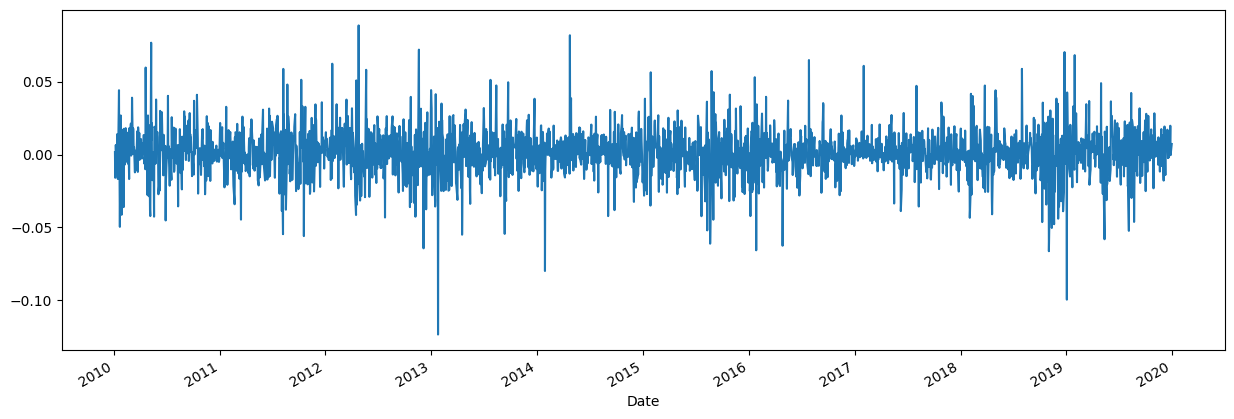

In [16]:
#Close price percentage change line graph

(aapl
.pct_change()
.Close
.plot(figsize=(15,5))
)

<Axes: >

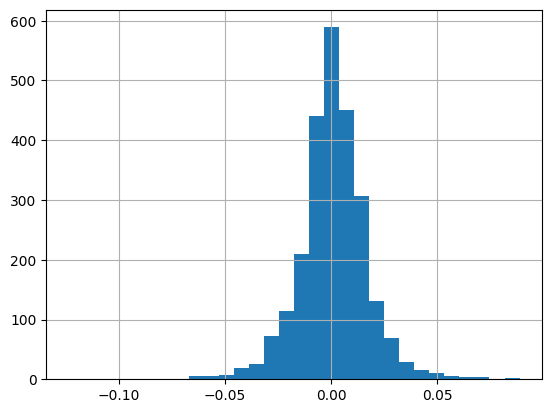

In [17]:
#Historgram
#Defaults to 10 bins unless otheriwse stated

(aapl
 .pct_change()
 .Close
 .hist(bins=(30))
)

Date
2019-08-09 00:00:00+00:00   -0.011994
2019-08-12 00:00:00+00:00   -0.002537
2019-08-13 00:00:00+00:00    0.042348
2019-08-14 00:00:00+00:00   -0.029765
2019-08-15 00:00:00+00:00   -0.004981
                               ...   
2019-12-24 00:00:00+00:00    0.000951
2019-12-26 00:00:00+00:00    0.019840
2019-12-27 00:00:00+00:00   -0.000379
2019-12-30 00:00:00+00:00    0.005935
2019-12-31 00:00:00+00:00    0.007307
Name: Close, Length: 100, dtype: float64

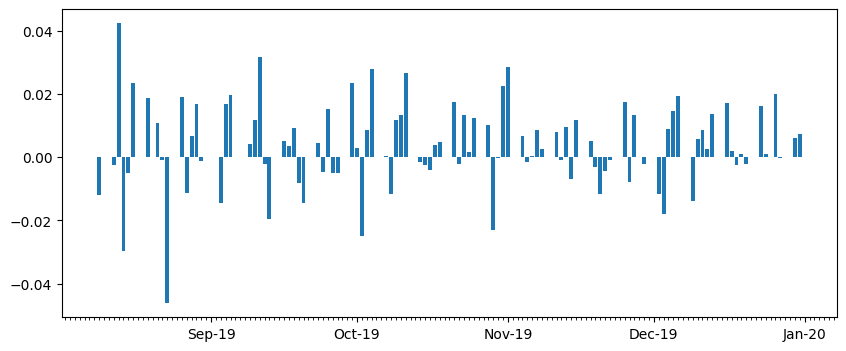

In [18]:
#Need to write a function to organise the dates because pandas messes them up if you use .bar()
#Close price for last 100 rows

def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10,4)) 
(aapl
    .pct_change()
    .Close
    .iloc[-100:]
    .pipe(my_bar, ax)
)

In [19]:
# cum returns = (current price - 0th price) / 0 th price

def cum_returns(df, col):
    ser=df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
            )

C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


<Axes: xlabel='Date'>

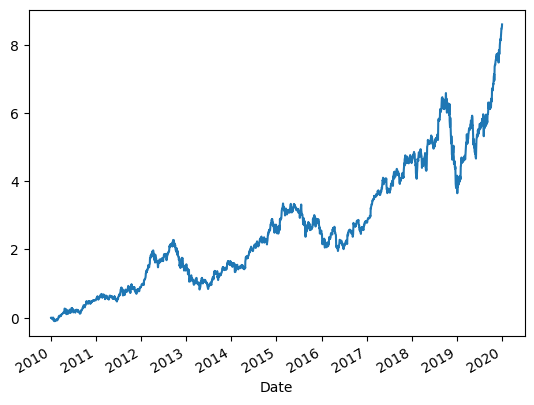

In [20]:
#cumulative returns plot

(aapl
 .pipe(cum_returns, 'Close')
 .plot()
 )

In [21]:
#Can use a lambda fucntion to create a new cum returns column

(aapl
 .assign(Cumulative= lambda df: cum_returns(df, 'Close'))
)

C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


,Adj Close,Close,High,Low,Open,Volume,Cumulative
Date,,,,,,,
2010-01-04 00:00:00+00:00,6.454504,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08 00:00:00+00:00,6.393281,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-24 00:00:00+00:00,68.974495,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26 00:00:00+00:00,70.342979,72.477501,72.495003,71.175003,71.205002,93121200,8.482594
2019-12-27 00:00:00+00:00,70.316269,72.449997,73.492500,72.029999,72.779999,146266000,8.478996


C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])
C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\matya\AppData\Local\Temp\ipykernel_6532\3719372058.p

Date
2019-08-09 00:00:00+00:00    5.574132
2019-08-12 00:00:00+00:00    5.557450
2019-08-13 00:00:00+00:00    5.835148
2019-08-14 00:00:00+00:00    5.631700
2019-08-15 00:00:00+00:00    5.598664
                               ...   
2019-12-24 00:00:00+00:00    8.298117
2019-12-26 00:00:00+00:00    8.482594
2019-12-27 00:00:00+00:00    8.478996
2019-12-30 00:00:00+00:00    8.535255
2019-12-31 00:00:00+00:00    8.604925
Name: Close, Length: 100, dtype: float64

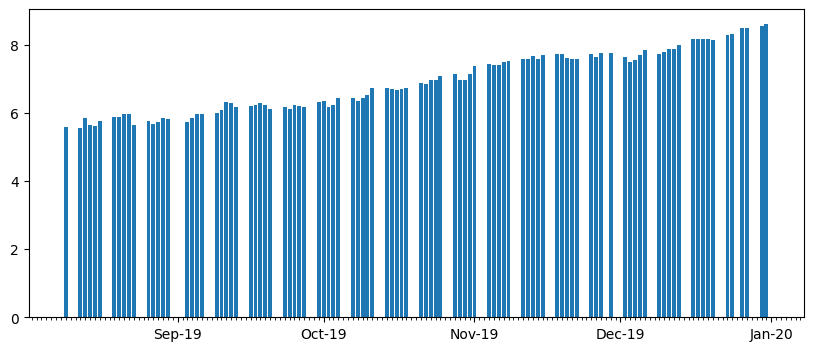

In [22]:
#Bar plot of the cumulative returns 

(aapl
 .assign(Cumulative= lambda df: cum_returns(df, 'Close'))
)

fig, ax = plt.subplots(figsize=(10,4)) 
(aapl
    .pipe(cum_returns, 'Close')
    .iloc[-100:]
    .pipe(my_bar, ax)
)

In [26]:
#Standard deviation of the percent change is a measure of volatility

(aapl
 .assign(Change=aapl.Close.pct_change())
 .rename(columns={'Change':'Percent Change'})
)


,Adj Close,Close,High,Low,Open,Volume,Percent Change
Date,,,,,,,
2010-01-04 00:00:00+00:00,6.454504,7.643214,7.660714,7.585000,7.622500,493729600,NaN
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06 00:00:00+00:00,6.362819,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849
2010-01-08 00:00:00+00:00,6.393281,7.570714,7.571429,7.466429,7.510714,447610800,0.006648
...,...,...,...,...,...,...,...
2019-12-24 00:00:00+00:00,68.974495,71.067497,71.222504,70.730003,71.172501,48478800,0.000951
2019-12-26 00:00:00+00:00,70.342979,72.477501,72.495003,71.175003,71.205002,93121200,0.019840
2019-12-27 00:00:00+00:00,70.316269,72.449997,73.492500,72.029999,72.779999,146266000,-0.000379
